In [193]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 
import datetime as datetime
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima

In [194]:
import yfinance as yf
from datetime import timedelta

In [195]:
End_time = datetime.date.today()

In [196]:
Start_time = End_time- timedelta(days=365*5)

In [197]:
data = yf.download("^NSEI",start=Start_time,end=End_time)

[*********************100%***********************]  1 of 1 completed


In [198]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2020-07-14,10607.349609,10755.650391,10562.900391,10750.849609,532400
2020-07-15,10618.200195,10827.450195,10577.750000,10701.000000,715900
2020-07-16,10739.950195,10755.299805,10595.200195,10706.200195,694400
2020-07-17,10901.700195,10933.450195,10749.650391,10752.000000,676900
2020-07-20,11022.200195,11037.900391,10953.000000,10999.450195,554300


In [199]:
data.columns

MultiIndex([( 'Close', '^NSEI'),
            (  'High', '^NSEI'),
            (   'Low', '^NSEI'),
            (  'Open', '^NSEI'),
            ('Volume', '^NSEI')],
           names=['Price', 'Ticker'])

In [200]:
data.index

DatetimeIndex(['2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17',
               '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23',
               '2020-07-24', '2020-07-27',
               ...
               '2025-06-30', '2025-07-01', '2025-07-02', '2025-07-03',
               '2025-07-04', '2025-07-07', '2025-07-08', '2025-07-09',
               '2025-07-10', '2025-07-11'],
              dtype='datetime64[ns]', name='Date', length=1237, freq=None)

In [201]:
#Data has Multi indexed columns i.e. columns is stored as tuple
if isinstance(data.columns,pd.MultiIndex):
    data.columns= [col[0] for col in data.columns]

In [202]:
data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-07-14,10607.349609,10755.650391,10562.900391,10750.849609,532400
2020-07-15,10618.200195,10827.450195,10577.750000,10701.000000,715900
2020-07-16,10739.950195,10755.299805,10595.200195,10706.200195,694400
2020-07-17,10901.700195,10933.450195,10749.650391,10752.000000,676900
2020-07-20,11022.200195,11037.900391,10953.000000,10999.450195,554300


In [203]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [204]:
#check if there is any null in the data
sum(data['Close'].isnull())
data.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [205]:
#check if there is any not a number value
data.isna().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

Text(0.5, 1.0, 'NIFTY50 last 5 years closing price')

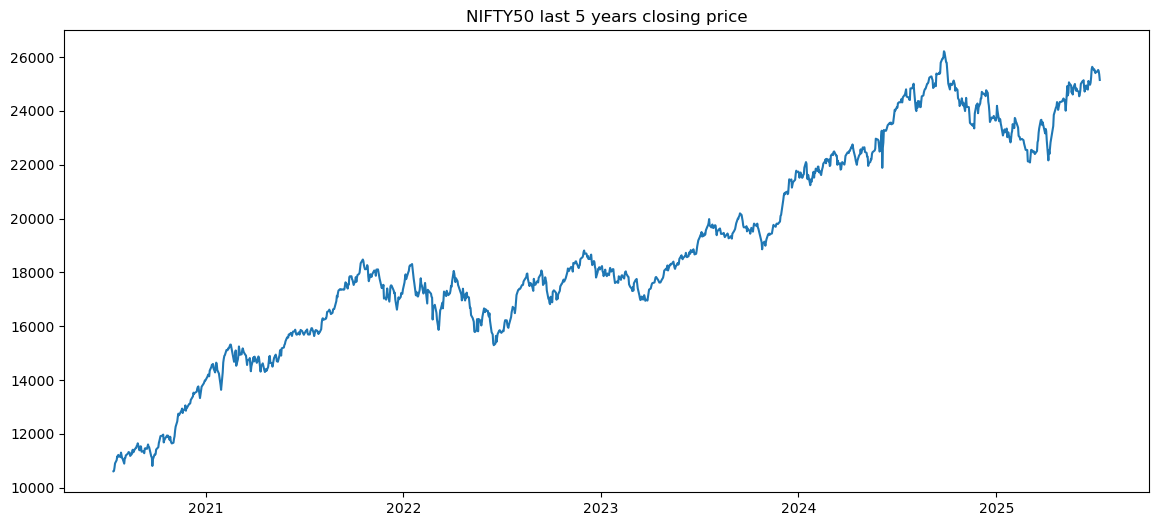

In [206]:
plt.figure(figsize=(14,6))
plt.plot(data.index,data['Close'], label='NIFTY 50')
plt.title("NIFTY50 last 5 years closing price")

In [207]:
#Decompose the time series to see trends, sesonality and residue 
add_decompose_results = seasonal_decompose(data['Close'], model="aditive",period=252)

In [208]:
#Decompose the time series to see trends, sesonality and residue 
mumltiple_decompose_results = seasonal_decompose(data['Close'], model="multiplicative",period=252)

<Figure size 1200x800 with 0 Axes>

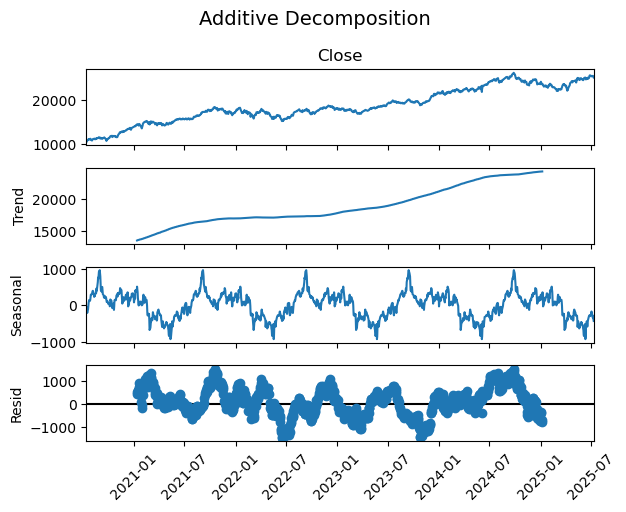

In [209]:
#plot Additive
plt.figure(figsize=(12,8))
add_decompose_results.plot()
plt.suptitle("Additive Decomposition", fontsize =14)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

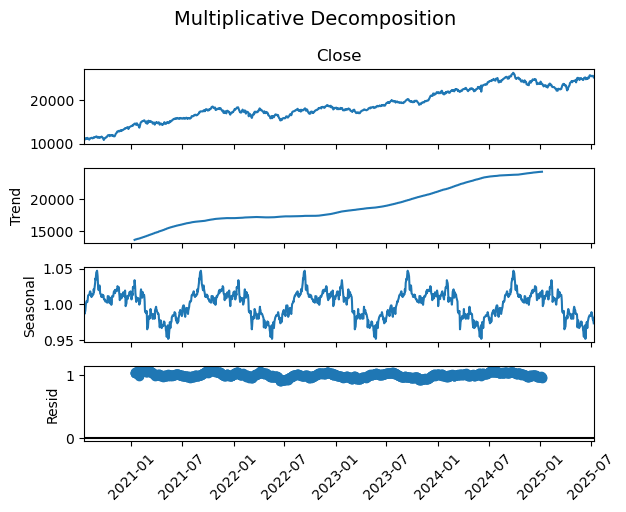

In [210]:
#plot multiplicative
#For multiplicative Resudue is not in proper range so better to select additive 
plt.figure(figsize=(12,8))
mumltiple_decompose_results.plot()
plt.suptitle("Multiplicative Decomposition", fontsize =14)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

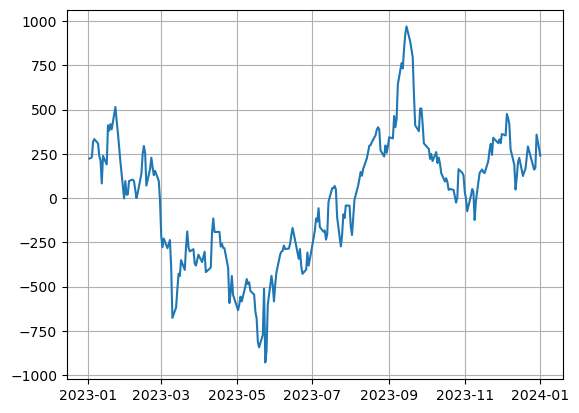

In [211]:
seasonal_zoom = add_decompose_results.seasonal['2023-01-01':'2024-01-01']
plt.plot(seasonal_zoom)
plt.grid()

In [212]:
type(add_decompose_results)
High_price_dates= data[data['Close']>950].index
Low_price_dates= data[data['Close']<-950].index


In [213]:
print(High_price_dates)

DatetimeIndex(['2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17',
               '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23',
               '2020-07-24', '2020-07-27',
               ...
               '2025-06-30', '2025-07-01', '2025-07-02', '2025-07-03',
               '2025-07-04', '2025-07-07', '2025-07-08', '2025-07-09',
               '2025-07-10', '2025-07-11'],
              dtype='datetime64[ns]', name='Date', length=1237, freq=None)


In [214]:
Seasonal_High = add_decompose_results.seasonal.loc[High_price_dates]
Seasonal_Low = add_decompose_results.seasonal.loc[Low_price_dates]

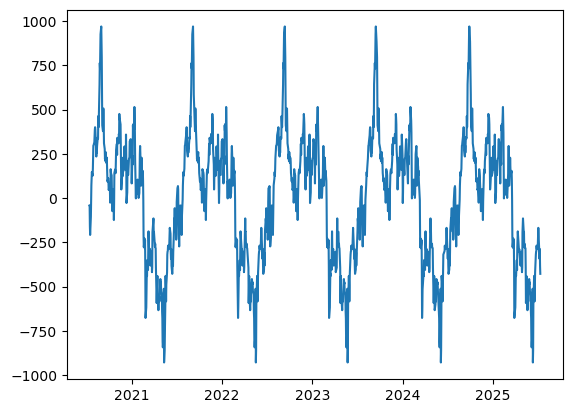

In [215]:
plt.plot(Seasonal_High)

In [216]:
# no much help. we want month wise seasonality insight
seasonal =add_decompose_results.seasonal
seasonal.index


DatetimeIndex(['2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17',
               '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23',
               '2020-07-24', '2020-07-27',
               ...
               '2025-06-30', '2025-07-01', '2025-07-02', '2025-07-03',
               '2025-07-04', '2025-07-07', '2025-07-08', '2025-07-09',
               '2025-07-10', '2025-07-11'],
              dtype='datetime64[ns]', name='Date', length=1237, freq=None)

In [217]:
#Convert seasonal to pandas dataframe
seasonal_df = seasonal.to_frame(name='seasonal')
seasonal_df.head()

,seasonal
Date,
2020-07-14,-41.504131
2020-07-15,-42.485626
2020-07-16,-160.146639
2020-07-17,-207.965215
2020-07-20,-105.906812


In [218]:
seasonal_df['month']= seasonal_df.index.month
seasonal_df['year']= seasonal_df.index.year

In [219]:
seasonal_df.head()

,seasonal,month,year
Date,,,
2020-07-14,-41.504131,7,2020
2020-07-15,-42.485626,7,2020
2020-07-16,-160.146639,7,2020
2020-07-17,-207.965215,7,2020
2020-07-20,-105.906812,7,2020


In [220]:
monthly_seasonality = seasonal_df.groupby('month').mean()
yearly_seasonality = seasonal_df.groupby('year')['seasonal'].mean()

In [221]:
monthly_seasonality

,seasonal,year
month,,
1,231.734888,2023.066667
2,109.600316,2022.990000
3,-266.578697,2022.930000
4,-367.485860,2023.010638
5,-548.755136,2023.019048
6,-354.768706,2022.952381
7,-102.548276,2022.398148
8,266.437968,2022.009524
9,483.709325,2021.971698


In [222]:
yearly_seasonality

year
2020    246.694821
2021     -4.405051
2022     -4.036445
2023     -3.626431
2024     -5.690888
2025   -164.355190
Name: seasonal, dtype: float64

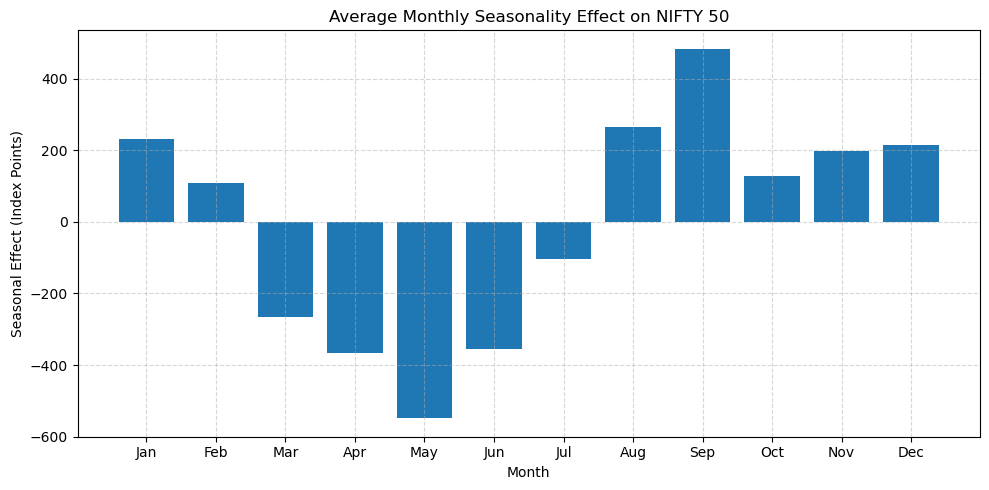

In [223]:
# I will plot monthly seasonability
#seasonability and return to be considered for Neural network models
plt.figure(figsize=(10,5))
plt.bar(monthly_seasonality.index,monthly_seasonality['seasonal'])
plt.xticks(ticks=range(1,13),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title("Average Monthly Seasonality Effect on NIFTY 50")
plt.xlabel("Month")
plt.ylabel("Seasonal Effect (Index Points)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

ARIMA Forecasting

In [224]:
nifty_arima = data['Close']

In [225]:
from statsmodels.tsa.stattools import adfuller

In [226]:
def adf_test(test_data):
    adf_result = adfuller(test_data)
    print("ADF_Statistic:",adf_result[0])
    print("p-value:",adf_result[1])
    if adf_result[1] > 0.05:
        print("Series is likely non-stationary. Differencing needed")
    else:
        print("Series is likely stationary")
 


In [227]:
adf_test(nifty_arima.diff().dropna())
# len(nifty_arima_diff)

ADF_Statistic: -35.60009767886595
p-value: 0.0
Series is likely stationary


module is stationary with d=1


In [228]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


To decide for lags in plots:
lags = min(40, len(series)/5)

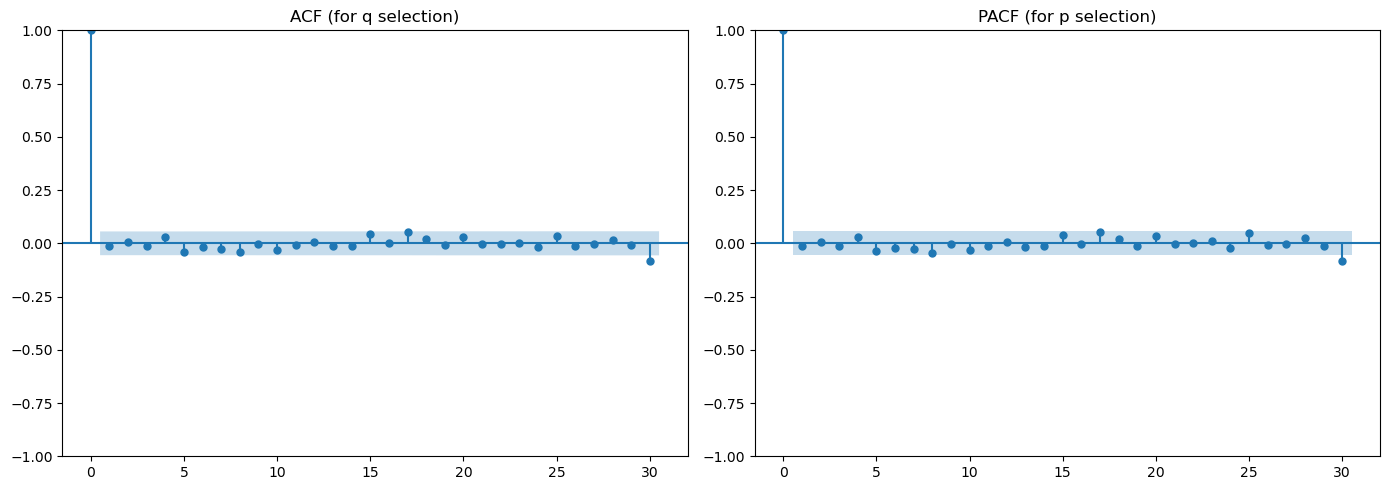

In [229]:
nifty_arima_diff = nifty_arima.diff().dropna()
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plot_acf(nifty_arima_diff,lags=30, ax=plt.gca())
plt.title('ACF (for q selection)')
plt.subplot(1,2,2)
plot_pacf(nifty_arima_diff,lags=30,ax =plt.gca())
plt.title('PACF (for p selection)')
plt.tight_layout()
plt.show()


Inconclusive ACF PACF plot. Better to go for AIC RMSE score

In [230]:
# Do train test split first
Nifty_train = nifty_arima[:-30]
Nifty_test = nifty_arima[-30:]

In [231]:
print(len(Nifty_train))
print(len(Nifty_test))

1207
30


In [232]:
model = ARIMA(Nifty_train, order=(0,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)
rmse = np.sqrt(mean_squared_error(Nifty_test,forecast))
aic = model_fit.aic

c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users

In [233]:
best_result = None
results=[]
Best_p = None
Best_q =None

In [234]:
aic

15825.801344558413

In [235]:
rmse

494.2139457017101

In [236]:
#Try combination of p and q from 0 to 5 with keeping d as 1
for p in range(6):
    for q in range(6):
        try:
            model = ARIMA(Nifty_train, order=(p,1,q))
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=30)
            rmse = np.sqrt(mean_squared_error(Nifty_test,forecast))
            aic = model_fit.aic
            results.append(((p,1,q),aic,rmse))
            if not np.isnan(rmse) and (best_result is None or rmse< best_result[2]):
                best_result= (((p,1,q),aic,rmse))
                Best_p =p
                Best_q = q
                print(f"New best model found: (p={p}, d=1, q={q}) with RMSE={rmse:.2f}")
        except Exception as e:
            print(f"Failed for order =({p},1,{q}):{e}")
            continue
            

c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users

New best model found: (p=0, d=1, q=0) with RMSE=494.21
New best model found: (p=0, d=1, q=1) with RMSE=493.46


c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates,

New best model found: (p=0, d=1, q=2) with RMSE=493.45
New best model found: (p=0, d=1, q=3) with RMSE=493.31


c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates,

New best model found: (p=1, d=1, q=1) with RMSE=492.83


c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates,

New best model found: (p=2, d=1, q=2) with RMSE=488.52


c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates,

New best model found: (p=2, d=1, q=5) with RMSE=478.73


c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates,

New best model found: (p=3, d=1, q=3) with RMSE=459.36


c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anacond

New best model found: (p=3, d=1, q=4) with RMSE=446.39


c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates,

New best model found: (p=4, d=1, q=3) with RMSE=386.69


c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anacond

In [237]:
print("Best ARIMA(p,d,q):", best_result[0])
print("AIC", best_result[1])
print("RMSE", best_result[2])
print("Best p value is:", Best_p)
print("Best q value is:", Best_q)

Best ARIMA(p,d,q): (4, 1, 3)
AIC 15830.770903440749
RMSE 386.69066124431953
Best p value is: 4
Best q value is: 3


We will plot the forecat and actual values

In [238]:
model = ARIMA(Nifty_train, order=(4,1,3))
model_fit =model.fit()

c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [239]:
forecast = model_fit.forecast(steps=30)

c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<function matplotlib.pyplot.show(close=None, block=None)>

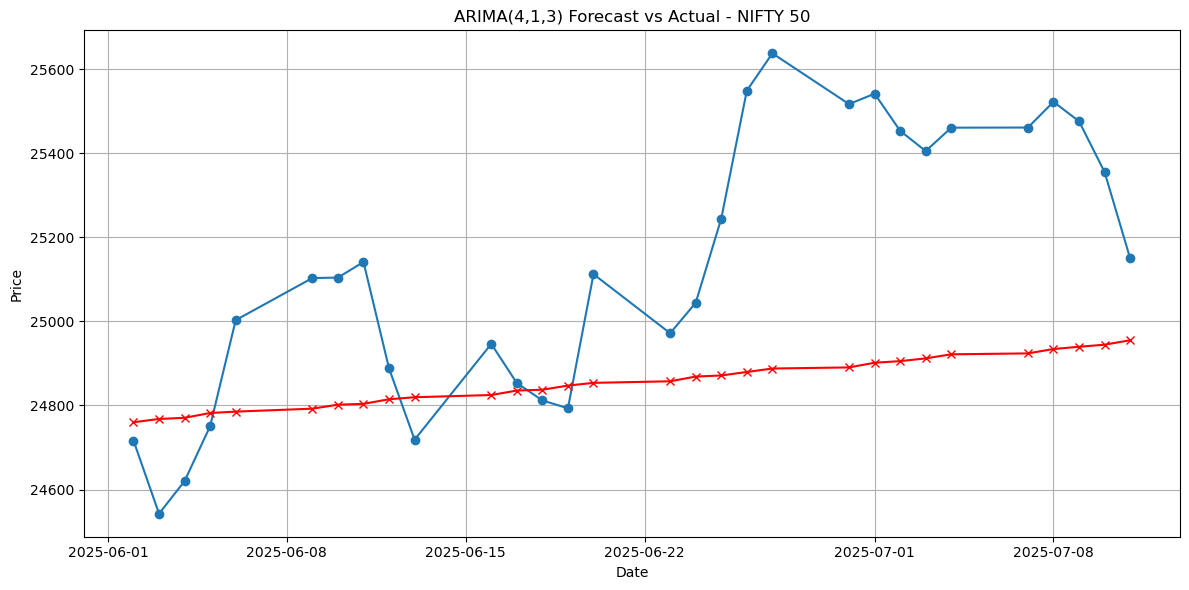

In [240]:
plt.figure(figsize=(12,6))
plt.plot(Nifty_test.index,Nifty_test, label = 'Actual', marker ='o')
plt.plot(Nifty_test.index,forecast,label = 'Forecast', marker ='x',color='red')
plt.title('ARIMA(4,1,3) Forecast vs Actual - NIFTY 50')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show

ARIMA doesn't perform well it does well with stationary and smooth time series

Try NIFTY returns with SARIMA

In [241]:
data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-07-14,10607.349609,10755.650391,10562.900391,10750.849609,532400
2020-07-15,10618.200195,10827.450195,10577.750000,10701.000000,715900
2020-07-16,10739.950195,10755.299805,10595.200195,10706.200195,694400
2020-07-17,10901.700195,10933.450195,10749.650391,10752.000000,676900
2020-07-20,11022.200195,11037.900391,10953.000000,10999.450195,554300


In [242]:
data['returns'] = data['Close'].pct_change()

In [243]:
data.dropna(inplace=True)

In [244]:
Returns_train = data['returns'][:-30]
Returns_test = data['returns'][-30:]

In [245]:
data.head()

,Close,High,Low,Open,Volume,returns
Date,,,,,,
2020-07-15,10618.200195,10827.450195,10577.750000,10701.000000,715900,0.001023
2020-07-16,10739.950195,10755.299805,10595.200195,10706.200195,694400,0.011466
2020-07-17,10901.700195,10933.450195,10749.650391,10752.000000,676900,0.015061
2020-07-20,11022.200195,11037.900391,10953.000000,10999.450195,554300,0.011053
2020-07-21,11162.250000,11179.549805,11113.250000,11126.099609,772000,0.012706


Auto ARIMA to find best SARIMA model with returns

In [246]:
# auto_model = auto_arima(Returns_train,
#                         seasonal= True, m=5,
#                         d=1,D=1,
#                         start_p=0, start_q=0, max_p=4, max_q=4,
#                         trace=True, stepwise=True,
#                         suppress_warnings=True)

In [248]:
auto_model = auto_arima(Returns_train,
                        seasonal= True, m=12,
                        d=1,D=1,
                        start_p=0, start_q=0, max_p=4, max_q=4,
                        trace=True, stepwise=True,
                        suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.94 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-6150.404, Time=0.59 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-6819.913, Time=1.80 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.68 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-6493.181, Time=0.24 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-6927.615, Time=1.18 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.88 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.04 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-6610.152, Time=1.19 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-7057.522, Time=4.79 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-6930.921, Time=1.62 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=15.69 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=6.40 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=-7152.951, Time=4.61 sec
 ARIMA(3,1,0)(1,1,0)[12]             : A

In [ ]:
print(auto_model.summary())


                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 1207
Model:             SARIMAX(4, 1, 1)x(2, 1, [], 12)   Log Likelihood                3704.816
Date:                             Sat, 12 Jul 2025   AIC                          -7393.633
Time:                                     23:29:12   BIC                          -7352.952
Sample:                                          0   HQIC                         -7378.305
                                            - 1207                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0401      0.024      1.701      0.089      -0.006       0.086
ar.L2         -0.0254      

In [ ]:
n_steps =30
order =auto_model.order
seasonal_order = auto_model.seasonal_order

In [ ]:
model = SARIMAX(Returns_train,order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity =False,
                enforce_invertibility =False
                )
fit = model.fit()

c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecast returns and convert back returns to prices

In [ ]:
forcast_returns= fit.forecast(steps=30)
forcast_returns.shape

c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(30,)

convert Return back to prices in a following way
Get the value befre forecast starts let us say it as 
last_price 
Now multiply it with (1+forecast_retun).cumprod()
in cumprod each next value of series is mulitplied with past value

In [ ]:
last_price = data['Close'].iloc[-31]
forecast_prices = last_price * (1 + forcast_returns).cumprod()
print(last_price)
forecast_prices.shape

24750.69921875


(30,)

In [ ]:
actual_prices = data['Close'].iloc[-30:]
actual_prices.shape

(30,)

Evaluation

In [ ]:
actual_prices = data['Close'].iloc[-30:]
rmse =np.sqrt(mean_squared_error(actual_prices,forecast_prices))
print("Best SARIMA order:", order)
print("Best seasonal order:", seasonal_order)
print("RMSE:", rmse)
print("AIC:",fit.aic)

Best SARIMA order: (4, 1, 1)
Best seasonal order: (2, 1, 0, 12)
RMSE: 527.8859839253732
AIC: -7245.441664488012


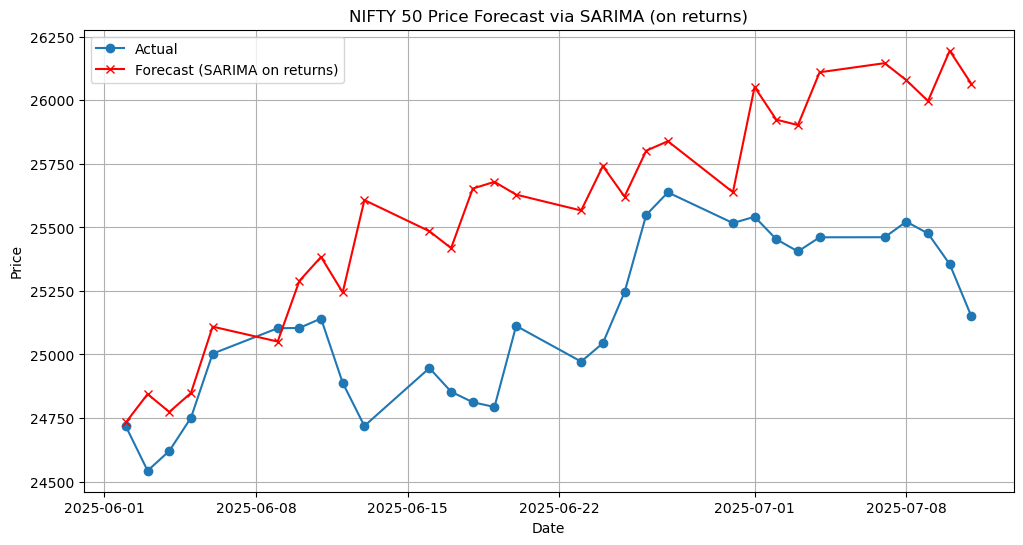

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(actual_prices.index, actual_prices, label="Actual",marker = 'o')
plt.plot(actual_prices.index, forecast_prices, label="Forecast (SARIMA on returns)", color='red',marker = 'x')
plt.title("NIFTY 50 Price Forecast via SARIMA (on returns)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()